In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **MDVP Extract Features**

In [2]:
!pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 30.0 MB/s eta 0:00:00


In [3]:
import parselmouth
import glob
import numpy as np
import pandas as pd

def measureVoice(voiceID):
  sound = parselmouth.Sound(voiceID)

  pitch = sound.to_pitch()
  fo = parselmouth.praat.call(pitch, "Get mean", 0, 0, "Hertz")
  fhi = parselmouth.praat.call(pitch, "Get maximum", 0, 0, "Hertz", "Parabolic")
  flo = parselmouth.praat.call(pitch, "Get minimum", 0, 0, "Hertz", "Parabolic")

  point_process = parselmouth.praat.call([sound, pitch], "To PointProcess (cc)")

  jitter_local = parselmouth.praat.call(point_process, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
  jitter_abs = parselmouth.praat.call(point_process, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
  jitter_rap = parselmouth.praat.call(point_process, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
  jitter_ppq = parselmouth.praat.call(point_process, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
  jitter_ddp = parselmouth.praat.call(point_process, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
  shimmer_local = parselmouth.praat.call([sound, point_process], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
  shimmer_dB = parselmouth.praat.call([sound, point_process], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
  shimmer_apq3 = parselmouth.praat.call([sound, point_process], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
  shimmer_apq5 = parselmouth.praat.call([sound, point_process], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
  shimmer_dda = parselmouth.praat.call([sound, point_process], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

  harmonicity = sound.to_harmonicity()
  hnr = parselmouth.praat.call(harmonicity, "Get mean", 0, 0)

  noise_start = sound.extract_part(0, 0.5, preserve_times=True, window_shape=parselmouth.WindowShape.RECTANGULAR)
  noise_end = sound.extract_part(9.5, 10, preserve_times=True, window_shape=parselmouth.WindowShape.RECTANGULAR)
  noise_energy = noise_start.get_energy() + noise_end.get_energy()
  signal_energy = sound.get_energy()
  nhr = noise_energy / signal_energy

  apq = parselmouth.praat.call([sound, point_process], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

  return fo, fhi, flo, jitter_local, jitter_abs, jitter_rap, jitter_ppq, jitter_ddp, shimmer_local, shimmer_dB, shimmer_apq3, shimmer_apq5, shimmer_dda, hnr, nhr, apq

def extractFeatures(soundFiles, filename, status):
  file_lists = []
  fo_lists = []
  fhi_lists = []
  flo_lists = []
  jitter_local_lists = []
  jitter_abs_lists = []
  jitter_rap_lists = []
  jitter_ppq_lists = []
  jitter_ddp_lists = []
  shimmer_local_lists = []
  shimmer_dB_lists = []
  shimmer_apq3_lists = []
  shimmer_apq5_lists = []
  shimmer_dda_lists = []
  hnr_lists = []
  nhr_lists = []
  apq_lists = []
  status_lists = []

  for soundFile in glob.glob(soundFiles):
      sound = parselmouth.Sound(soundFile)
      (fo, fhi, flo, jitter_local, jitter_abs, jitter_rap, jitter_ppq, jitter_ddp, shimmer_local, shimmer_dB, shimmer_apq3, shimmer_apq5, shimmer_dda, hnr, nhr, apq) = measureVoice(sound)

      file_lists.append(soundFile)
      fo_lists.append(fo)
      fhi_lists.append(fhi)
      flo_lists.append(flo)
      jitter_local_lists.append(jitter_local)
      jitter_abs_lists.append(jitter_abs)
      jitter_rap_lists.append(jitter_rap)
      jitter_ppq_lists.append(jitter_ppq)
      jitter_ddp_lists.append(jitter_ddp)
      shimmer_local_lists.append(shimmer_local)
      shimmer_dB_lists.append(shimmer_dB)
      shimmer_apq3_lists.append(shimmer_apq3)
      shimmer_apq5_lists.append(shimmer_apq5)
      shimmer_dda_lists.append(shimmer_dda)
      hnr_lists.append(hnr)
      nhr_lists.append(nhr)
      apq_lists.append(apq)
      status_lists.append(status)


  df = pd.DataFrame(np.column_stack([file_lists, fo_lists, fhi_lists, flo_lists, jitter_local_lists, jitter_abs_lists, jitter_rap_lists, jitter_ppq_lists, jitter_ddp_lists, shimmer_local_lists, shimmer_dB_lists, shimmer_apq3_lists, shimmer_apq5_lists, shimmer_dda_lists, hnr_lists, nhr_lists, apq_lists, status_lists]),
                    columns=['voice', 'MDVP:Fo (Hz)','MDVP:Fhi (Hz)','MDVP:Flo (Hz)','MDVP:Jitter (%)','MDVP:Jitter (Abs)','Jitter:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer (dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA','NHR','HNR','MDVP:APQ','status'])

  df.to_csv(filename, index=False)

Extract Healthy

In [4]:
healthy_source = "/content/drive/MyDrive/MOST/Thesis/HEALTH/*"
healthy_output = "/content/drive/MyDrive/MOST/Thesis/HEALTH/healthy.csv"

extractFeatures(healthy_source, healthy_output, 0);

Extract Feature Nodule

In [5]:
nodule_source = "/content/drive/MyDrive/MOST/Thesis/noduleset/*"
nodule_output = "/content/drive/MyDrive/MOST/Thesis/noduleset/nodule.csv"

extractFeatures(nodule_source, nodule_output, 1);

Extract Feature Polyps

In [6]:
polyps_source = "/content/drive/MyDrive/MOST/Thesis/polyp/*"
polyps_output = "/content/drive/MyDrive/MOST/Thesis/polyp/polyps.csv"

extractFeatures(polyps_source, polyps_output, 2);

Extract Feature Reinke's Edema

In [7]:
reinke_edema_source = "/content/drive/MyDrive/MOST/Thesis/reinke/*"
reinke_edema_output = "/content/drive/MyDrive/MOST/Thesis/reinke/reinkes_edema.csv"

extractFeatures(reinke_edema_source, reinke_edema_output, 3);

In [8]:
paralysis_source = "/content/drive/MyDrive/MOST/Thesis/PARALYSISdataset/*"
paralysis_output = "/content/drive/MyDrive/MOST/Thesis/PARALYSISdataset/paralysis.csv"

extractFeatures(paralysis_source, paralysis_output, 2);

# **Classifications**

Load and Prepare Data


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

healthy = pd.read_csv('/content/drive/MyDrive/MOST/Thesis/HEALTH/healthy.csv')
pathology = pd.read_csv('/content/drive/MyDrive/MOST/Thesis/polyp/polyps.csv')

data = pd.concat([healthy, pathology], ignore_index=True)

features = data.drop(['voice', 'status'], axis=1)
targets = data['status']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=11)

In [5]:
pathology.head()

,voice,MDVP:Fo (Hz),MDVP:Fhi (Hz),MDVP:Flo (Hz),MDVP:Jitter (%),MDVP:Jitter (Abs),Jitter:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,MDVP:APQ,status
0,/content/drive/MyDrive/MOST/Thesis/PARALYSISda...,196.688873,257.354630,65.815683,0.009286,0.000047,0.004151,0.004097,0.012454,0.034334,0.405400,0.018604,0.020541,0.055811,18.523198,0.001347,0.025595,2
1,/content/drive/MyDrive/MOST/Thesis/PARALYSISda...,177.664862,392.177039,75.424331,0.010824,0.000061,0.004342,0.004581,0.013026,0.044500,0.541594,0.020672,0.026031,0.062015,15.102572,0.006997,0.038159,2
2,/content/drive/MyDrive/MOST/Thesis/PARALYSISda...,179.981379,608.928639,66.863475,0.017452,0.000097,0.008193,0.008569,0.024579,0.087582,0.847889,0.043173,0.053686,0.129520,11.765278,0.000146,0.071318,2
3,/content/drive/MyDrive/MOST/Thesis/PARALYSISda...,177.066100,590.315506,66.077438,0.013705,0.000078,0.005896,0.005401,0.017687,0.047603,0.584285,0.022711,0.027781,0.068133,14.232683,0.002524,0.039603,2
4,/content/drive/MyDrive/MOST/Thesis/PARALYSISda...,199.522981,615.466850,66.716454,0.017084,0.000088,0.007040,0.007450,0.021120,0.100995,1.059356,0.052029,0.068670,0.156088,10.022149,0.014057,0.071643,2


In [9]:
y_train.head()

28    1
75    1
59    1
16    0
30    1
Name: status, dtype: int64

In [10]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

**XGBoost**

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np

xgb_first_model = XGBClassifier(n_estimators=100, eval_metric=["auc", "error", "logloss"], random_state=5)
xgb_first_model.fit(X_train, y_train, eval_set=[( X_test, y_test)], verbose=5)

param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.001, 0.01, 0.1],
    # 'min_child_weight': [1, 10, 100]
}

grid_search = GridSearchCV(estimator=xgb_first_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=4, verbose=5)
grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
print(f'Best Hyperparameters: {best_estimator}')

[0]	validation_0-auc:0.95833	validation_0-error:0.05882	validation_0-logloss:0.44383
[5]	validation_0-auc:0.99167	validation_0-error:0.05882	validation_0-logloss:0.22919
[10]	validation_0-auc:0.99167	validation_0-error:0.05882	validation_0-logloss:0.20576
[15]	validation_0-auc:0.99167	validation_0-error:0.05882	validation_0-logloss:0.21927
[20]	validation_0-auc:0.99167	validation_0-error:0.05882	validation_0-logloss:0.23429
[25]	validation_0-auc:1.00000	validation_0-error:0.11765	validation_0-logloss:0.24011
[30]	validation_0-auc:1.00000	validation_0-error:0.11765	validation_0-logloss:0.24605
[35]	validation_0-auc:1.00000	validation_0-error:0.11765	validation_0-logloss:0.25534
[40]	validation_0-auc:0.98333	validation_0-error:0.11765	validation_0-logloss:0.26166
[45]	validation_0-auc:0.98333	validation_0-error:0.11765	validation_0-logloss:0.26830
[50]	validation_0-auc:0.98333	validation_0-error:0.11765	validation_0-logloss:0.27234
[55]	validation_0-auc:0.98333	validation_0-error:0.11765

[0]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.61424
[5]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.61089
[10]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.60757
[15]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.60428
[20]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.60103
[25]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.59781
[30]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.59462
[35]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.59146
[40]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.58834
[45]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.58524
[50]	validation_0-auc:0.95833	validation_0-error:0.29412	validation_0-logloss:0.58217
[55]	validation_0-auc:0.95833	validation_0-error:0.29412

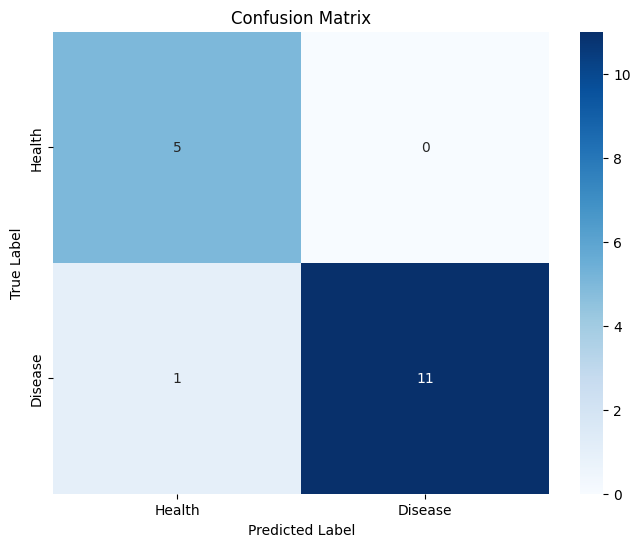

{'Training Accuracy scores': array([0.69230769, 0.69230769, 0.71428571, 0.71428571, 0.71428571]),
 'Mean Training Accuracy': 70.54945054945055,
 'Training Precision scores': array([0.69230769, 0.69230769, 0.71428571, 0.71428571, 0.71428571]),
 'Mean Training Precision': 0.7054945054945055,
 'Training Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([0.81818182, 0.81818182, 0.83333333, 0.83333333, 0.83333333]),
 'Mean Training F1 Score': 0.8272727272727272,
 'Validation Accuracy scores': array([0.75      , 0.75      , 0.66666667, 0.66666667, 0.66666667]),
 'Mean Validation Accuracy': 70.0,
 'Validation Precision scores': array([0.75      , 0.75      , 0.66666667, 0.66666667, 0.66666667]),
 'Mean Validation Precision': 0.7,
 'Validation Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Recall': 1.0,
 'Validation F1 scores': array([0.85714286, 0.85714286, 0.8       , 0.8       , 0.8       ]),
 'Mean Validation F1 Score': 

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


xgb_model = best_estimator
xgb_model.fit(X_train, y_train, eval_set=[( X_test, y_test)], verbose=5)

xgb_predict_labels = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predict_labels)
print(f'Accuracy: {xgb_accuracy:.2f}')

print('Report:\n', classification_report(y_test, xgb_predict_labels))

conf_matrix = confusion_matrix(y_test, xgb_predict_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Health', 'Disease'], yticklabels=['Health', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

xgb_df = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':xgb_predict_labels})

xgb_model.save_model("xgb_model.json")

xgb_result = cross_validation(xgb_model, X_test, y_test, 5)
xgb_result


**RandomForest**

RF Accuracy: 0.8823529411764706


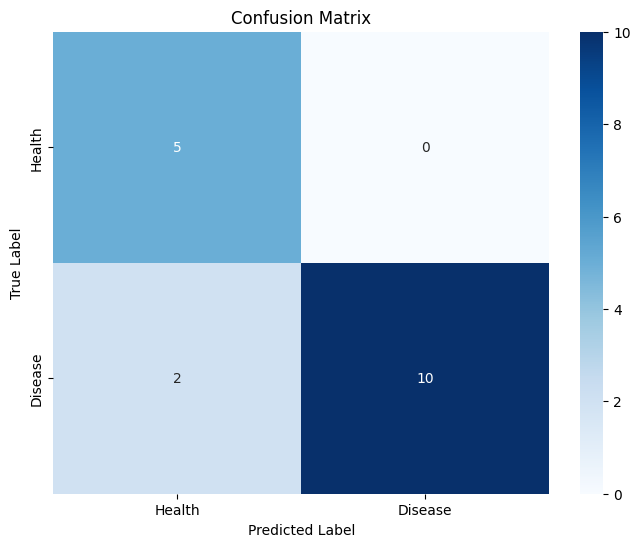

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.75      , 1.        , 0.66666667, 1.        , 1.        ]),
 'Mean Validation Accuracy': 88.33333333333331,
 'Validation Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Precision': 1.0,
 'Validation Recall scores': array([0.66666667, 1.        , 0.5       , 1.        , 1.        ]),
 'Mean Validation Recall': 0.8333333333333333,
 'Validation F1 scores': array([0.8       , 1.        , 0.66666667, 1.        , 1.        ]),
 'Mean Validation F1 Score': 0.8933333333333333}

In [13]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

rfmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)
#y_pred = y_pred.tolist()

rf_df = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_pred})

rf_accuracy = metrics.accuracy_score(rf_df['y_Actual'].tolist(), rf_df['y_Predicted'].tolist())
print("RF Accuracy:", rf_accuracy)


# Menghitung dan menampilkan matriks konfusi untuk model terbaik
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Health', 'Disease'], yticklabels=['Health', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

rfscore = cross_validation(rfmodel, X_test, y_test , 5)
rfscore

**SVM**

Accuracy: 0.8823529411764706


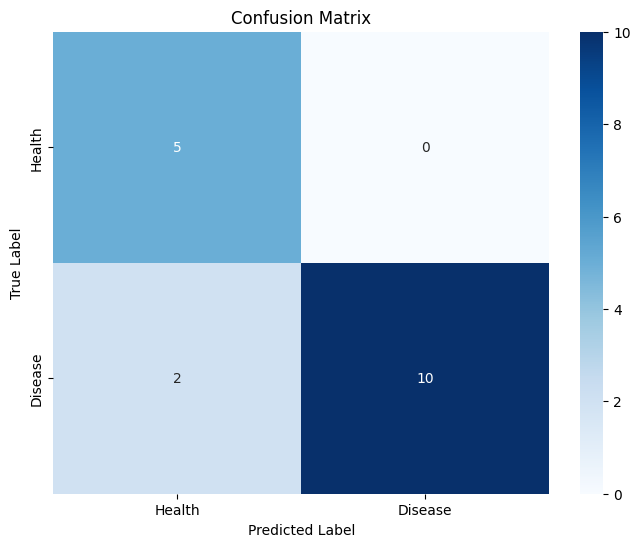

{'Training Accuracy scores': array([1.        , 0.92307692, 0.92857143, 0.92857143, 0.92857143]),
 'Mean Training Accuracy': 94.17582417582418,
 'Training Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1.        , 0.88888889, 0.9       , 0.9       , 0.9       ]),
 'Mean Training Recall': 0.9177777777777777,
 'Training F1 scores': array([1.        , 0.94117647, 0.94736842, 0.94736842, 0.94736842]),
 'Mean Training F1 Score': 0.9566563467492261,
 'Validation Accuracy scores': array([0.75      , 1.        , 0.66666667, 1.        , 1.        ]),
 'Mean Validation Accuracy': 88.33333333333331,
 'Validation Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Precision': 1.0,
 'Validation Recall scores': array([0.66666667, 1.        , 0.5       , 1.        , 1.        ]),
 'Mean Validation Recall': 0.8333333333333333,
 'Validation F1 scores': array([0.8       , 1.        , 0.66666667, 1.        , 1.        ]),
 

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

y_pr = clf.predict(X_test)

y_predic_list = y_pr.tolist()
svm_df = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_predic_list})

svm_accuracy = metrics.accuracy_score(y_test, y_pr)

print("Accuracy:", svm_accuracy)

# Menghitung dan menampilkan matriks konfusi untuk model terbaik
conf_matrix = confusion_matrix(y_test, y_pr)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Health', 'Disease'], yticklabels=['Health', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

svmscore = cross_validation(clf, X_test, y_test , 5)
svmscore

**ANN**

Epoch 1/25
22/22 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.6462
Epoch 2/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.6462
Epoch 3/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6462
Epoch 4/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.6462
Epoch 5/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6462
Epoch 6/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6462
Epoch 7/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.6462
Epoch 8/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6462
Epoch 9/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6462
Epoch 10/25
22/22 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6462
Epoch 11/25
22/22 [

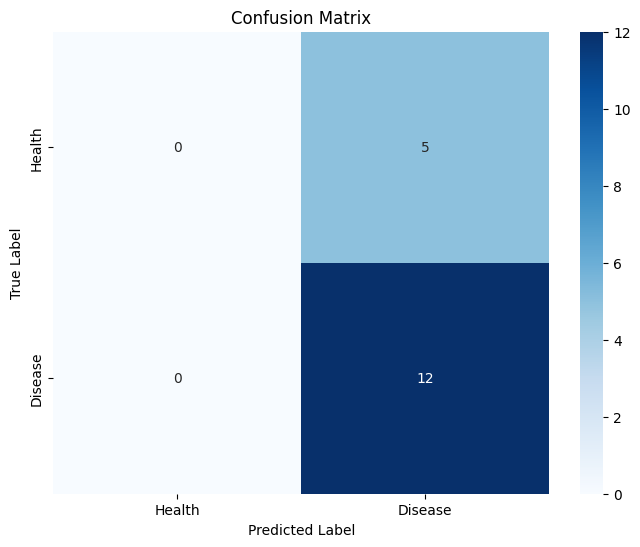

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=8, input_dim=16, kernel_initializer='uniform', activation='relu'))

classifier.add(Dense(units=7, input_dim=8, kernel_initializer='uniform', activation='relu'))

classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
classifier.fit(X_train,y_train, batch_size=3 , epochs=25, verbose=1)

# fitting the Neural Network on the training data
classifier.fit(X_train,y_train, batch_size=3 , epochs=25, verbose=1)

ann_prediction = classifier.predict(X_test)
y_ann_pre = np.where(ann_prediction > 0.5, 1, 0)
y_ann_pre = y_ann_pre.reshape(-1).tolist()

ann_df = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_ann_pre})

ann_accuracy = metrics.accuracy_score(ann_df['y_Actual'].tolist(), ann_df['y_Predicted'].tolist())

print("ANN Accuracy:", ann_accuracy)

# Menghitung dan menampilkan matriks konfusi untuk model terbaik
conf_matrix = confusion_matrix(y_test, y_ann_pre)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Health', 'Disease'], yticklabels=['Health', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Evaluation**

In [16]:
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')
print(f'RF Accuracy: {rf_accuracy:.2f}')
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'ANN Accuracy: {ann_accuracy:.2f}')

XGBoost Accuracy: 0.94
RF Accuracy: 0.88
SVM Accuracy: 0.88
ANN Accuracy: 0.71


In [17]:
import plotly.express as px

acc_df = pd.DataFrame({'method':['XGB',
                                'RF',
                                'SVM',
                                'ANN'],
                       'Acc':[xgb_accuracy, rf_accuracy, svm_accuracy, ann_accuracy]})
fig = px.line(acc_df, x="method", y="Acc", title='Accuracy of Models')
fig.show()

In [18]:
def draw_confusionx(df, method='randomforest'):
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.to_numpy().flatten()]
    group_percentages = ["{0:.2f}".format(value) for value in (confusion_matrix/np.sum(confusion_matrix)).to_numpy().flatten()]
    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(4,4)
    ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
#     plt.title('the Confusion Maxtrix of the {}'.format(config['method']))
    plt.savefig('{}_confusion_matrix.pdf'.format(method), bbox_inches = 'tight')
    return plt

def roc_auc_mean_std(df):
    y_test = df['y_Actual'].tolist()
    y_pred = df['y_Predicted'].tolist()

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    aucs = []
    tprs = []
    fprs = []

    for i in range(2):
#         fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
        tprs.append(tpr[i])
        fprs.append(fpr[i])
        aucs.append(roc_auc[i])

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_fpr = np.mean(fprs, axis=0)
    mean_fpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    return mean_fpr, mean_tpr, mean_auc, std_auc

In [19]:
label_xgb_df = xgb_df.replace([0,1], ['Healthy','Pathology'])
label_randf_df = rf_df.replace([0,1],['Healthy','Pathology'])
label_svm_df = svm_df.replace([0,1], ['Healthy','Pathology'])
label_ann_df = ann_df.replace([0,1], ['Healthy','Pathology'])

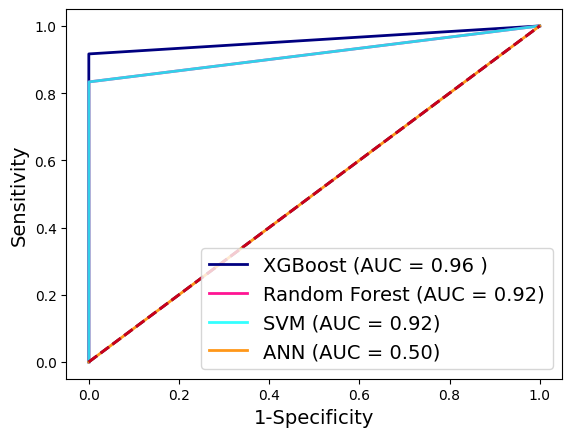

In [20]:
plt.figure()
lw = 2
alpha = 0.9

# roc_xgb_df, roc_randf_df, roc_svm_df, roc_ann_df
#xgb_df, rf_df, svm_df, ann_df

mean_fpr, mean_tpr, mean_auc, std_auc = roc_auc_mean_std(xgb_df)
plt.plot(mean_fpr,
         mean_tpr,
         label=r"XGBoost (AUC = %0.2f )" %(mean_auc),
         color="navy",
         lw=lw,
         alpha=1)

mean_fpr, mean_tpr, mean_auc, std_auc = roc_auc_mean_std(rf_df)
plt.plot(mean_fpr,
         mean_tpr,
         label=r"Random Forest (AUC = %0.2f)" %(mean_auc),
         color="deeppink",
         lw=lw,
         alpha=1)


mean_fpr, mean_tpr, mean_auc, std_auc = roc_auc_mean_std(svm_df)
plt.plot(mean_fpr,
         mean_tpr,
         label=r"SVM (AUC = %0.2f)" %(mean_auc),
         color="aqua",
         lw=lw,
         alpha=0.8)

mean_fpr, mean_tpr, mean_auc, std_auc = roc_auc_mean_std(ann_df)
plt.plot(mean_fpr,
         mean_tpr,
         label=r"ANN (AUC = %0.2f)" %(mean_auc),
         color="darkorange",
         lw=lw,
         alpha=alpha)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

plt.xlabel("1-Specificity", fontsize=14)
plt.ylabel("Sensitivity", fontsize=14)


plt.legend(loc="lower right", prop={'size': 14})

# plt.savefig('roc_curve.png', dpi=1000, bbox_inches = 'tight')
plt.show()